In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Spectrogram estimation

Spectrograms are very common audio representations in MIR research. PyMIR3 provides a tool that allows fast spectrogram calculation. This notebook presents an example of its use.

In [16]:
import mir3.modules.tool.wav2spectrogram as spec

converter = spec.Wav2Spectrogram()
s = converter.convert(open("examples/157447__nengisuls__solo-loops-2.wav"), window_length=1024,
                      dft_length=1024, window_step=512, spectrum_type='magnitude', save_metadata=True)
#s = converter.convert(open("examples/academia1.wav"), window_length=1024,
#                      dft_length=1024, window_step=512, spectrum_type='magnitude', save_metadata=True)

At this point, $s$ contains a spectrogram of the audiofile. The spectrogram parameters are:
* window_length: Length, in samples, of the spectrogram window. The spectrogram always uses a Hanning window, as it is common in MIR-related research.
* dft_length: Length, in samples, of the dft. If it is larger than window_length, the window will be zero-padded.
* window_step: Step, in samples, between the beginning of two subsequent windows
* spectrum_type: Defines the type of spectrum that will be yielded. Other possibilities are *log*, *db* and *power*.
* save_metadata: Flag indicating if metadata should be saved in $s$.

Prior to spectrogram calculation, the input audio file is normalized to zero mean and unit variance across all of its samples.

## Viewing metadata

By default, PyMIR3 data-related objects save metadata information. They can be found in the *metadata* attribute of the generated data object. It is always possible to use *dir(s.metadata)* to generate a list of all available metadata. Some examples follow:

In [17]:
print "Input file name:", s.metadata.input.name
print "Minimum represented frequency:", s.metadata.min_freq
print "Maximum represented frequency:", s.metadata.max_freq
print "Minimum represented time:", s.metadata.min_time
print "Maximum represented time (s):", s.metadata.max_time
print "Input sample rate (Hz):", s.metadata.sampling_configuration.fs
print "Output sample rate (Hz):", s.metadata.sampling_configuration.ofs
print "Spectrum type:", s.metadata.sampling_configuration.spectrum_type
print "Window length (samples):", s.metadata.sampling_configuration.window_length
print "Window step (samples):", s.metadata.sampling_configuration.window_step
print "Window shape:", s.metadata.sampling_configuration.window_shape
print "DFT length (samples):", s.metadata.sampling_configuration.dft_length

Input file name: examples/157447__nengisuls__solo-loops-2.wav
Minimum represented frequency: 0.0
Maximum represented frequency: 22050.0
Minimum represented time: 0.0
Maximum represented time (s): 5.68891156463
Input sample rate (Hz): 44100
Output sample rate (Hz): 86.1328125
Spectrum type: magnitude
Window length (samples): 1024
Window step (samples): 512
Window shape: Hanning
DFT length (samples): 1024


## Viewing data

The actual spectrogram data is contained in the *data* attribute. This attribute, in the case of spectrograms, is represented by a two-dimensional numpy array. Within this representation, columns represent time frames and lines represent frequencies. Therefore, it is quite easy to plot spectrograms using Python-native tools, as follows:


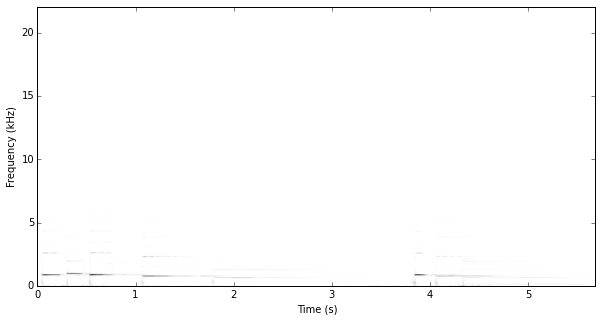

In [18]:
def plot(spectrogram, size=(3.45,2.0)):
    """Plots the a spectrogram to an output file
    """

    d = spectrogram.data
    d = d/np.max(d)
    d = 1 - d

    min_freq = spectrogram.metadata.min_freq
    max_freq = spectrogram.metadata.max_freq
    min_time = spectrogram.metadata.min_time
    max_time = spectrogram.metadata.max_time

    im = plt.imshow(d, aspect='auto', origin='lower', cmap=plt.cm.gray,\
            extent=[min_time, max_time, min_freq/1000.0, max_freq/1000.0])
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (kHz)')
    fig = plt.gcf()
    width_inches = size[0]#/80.0
    height_inches = size[1]#/80.0
    fig.set_size_inches( (width_inches, height_inches) )
    fig.show()

plot(s, (10, 5))

## Cropping spectrograms

As we can see in the figure above, viewing the whole spectrogram of a piece can lead to a resolution problem. This can be solved using the *TrimSpectrogram()* class, which is responsible for generating a new spectrogram that contains the original data within given frequency and time limits. It can be used as:


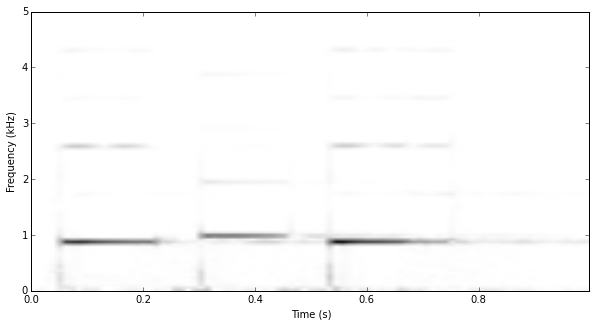

In [21]:
import mir3.modules.tool.trim_spectrogram as trim

t = trim.TrimSpectrogram()
s_new = t.trim(s, min_freq=0, max_freq=5000, min_time=0, max_time=1, save_metadata=True)
plot(s_new, (10, 5))

## Metadata visualization

The trimmed spectrogram is an spectrogram, as well. Its metadata can be visualized from 

In [22]:
print "Minimum represented frequency:", s_new.metadata.min_freq
print "Maximum represented frequency:", s_new.metadata.max_freq
print "Minimum represented time:", s_new.metadata.min_time
print "Maximum represented time (s):", s_new.metadata.max_time
print "Input sample rate (Hz):", s_new.metadata.sampling_configuration.fs
print "Output sample rate (Hz):", s_new.metadata.sampling_configuration.ofs
print "Spectrum type:", s_new.metadata.sampling_configuration.spectrum_type
print "Window length (samples):", s_new.metadata.sampling_configuration.window_length
print "Window step (samples):", s_new.metadata.sampling_configuration.window_step
print "Window shape:", s_new.metadata.sampling_configuration.window_shape
print "DFT length (samples):", s_new.metadata.sampling_configuration.dft_length

Minimum represented frequency: 0.0
Maximum represented frequency: 4995.703125
Minimum represented time: 0.0
Maximum represented time (s): 0.998458049887
Input sample rate (Hz): 44100
Output sample rate (Hz): 86.1328125
Spectrum type: magnitude
Window length (samples): 1024
Window step (samples): 512
Window shape: Hanning
DFT length (samples): 1024


## Reviewing operations

By default, data containers in PyMIR3 preserve a copy of all metadata from the preserved input. The input metadata is preserved in *s.metadata.input_metadata*. Thus, it can be accessed as follows:

In [23]:
print "Minimum represented frequency:", s_new.metadata.input_metadata.min_freq
print "Maximum represented frequency:", s_new.metadata.input_metadata.max_freq
print "Minimum represented time:", s_new.metadata.input_metadata.min_time
print "Maximum represented time (s):", s_new.metadata.input_metadata.max_time
print "Input sample rate (Hz):", s_new.metadata.input_metadata.sampling_configuration.fs
print "Output sample rate (Hz):", s_new.metadata.input_metadata.sampling_configuration.ofs
print "Spectrum type:", s_new.metadata.input_metadata.sampling_configuration.spectrum_type
print "Window length (samples):", s_new.metadata.input_metadata.sampling_configuration.window_length
print "Window step (samples):", s_new.metadata.input_metadata.sampling_configuration.window_step
print "Window shape:", s_new.metadata.input_metadata.sampling_configuration.window_shape
print "DFT length (samples):", s_new.metadata.input_metadata.sampling_configuration.dft_length

Minimum represented frequency: 0.0
Maximum represented frequency: 22050.0
Minimum represented time: 0.0
Maximum represented time (s): 5.68891156463
Input sample rate (Hz): 44100
Output sample rate (Hz): 86.1328125
Spectrum type: magnitude
Window length (samples): 1024
Window step (samples): 512
Window shape: Hanning
DFT length (samples): 1024
